In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
#pd.options.display.max_rows = 20

#import sklearn

#import itertools

#import logging
#logging.basicConfig()
#logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)

from IPython.display import Image

Chapter 5 Monte Carlo Methods
================

Monte Carlo methods require only *experience*: sample sequences of states, actions, and rewards from actual or simulated interaction with an environment.

requirements: averaging sample returns => we define Monte Carlo methods only for episodic tasks.

### 5.1 Monte Carlo Prediction

the value of a state: expected return starting from that state.

An obvious way to estimate it from experience: simply to average the returns observed after visits to that state.

$s$ may be visited multiple times in the same episode:
+ first-visit MC method
+ every-visit MC method

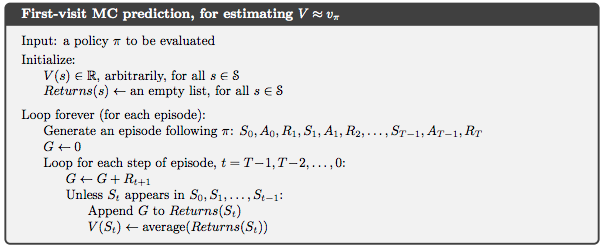

In [3]:
Image('./res/first_visit_mc.png')

Monte Carlo methods do not *bootstrap*: the estimate for one state does not build upon the estimate of any other state.

The computational expense of estimating the value of a single state is independent of the number of states.    
=> One can generate many sample episodes starting from the states of interest, averaging returns from only these states, ignoring all others.

### 5.2 Monte Carlo Estimation of Action Values

If a model is not available, useful to estimate *action* values $q_\pi(s, a)$ rather than *state* values.

maintain exploration problem: many state-action pairs may never be visited.
+ exploring starts: every pair has a nonzero probability of being selected as start point.
+ make policy stochasic with a nonzero probability of selecting all actions in each state.

### 5.3 Monte Carlo Control

$\pi(s) \doteq \operatorname{arg max}_a q(s, a)$

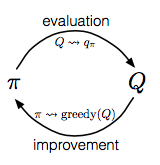

In [4]:
Image('./res/gpi.png')

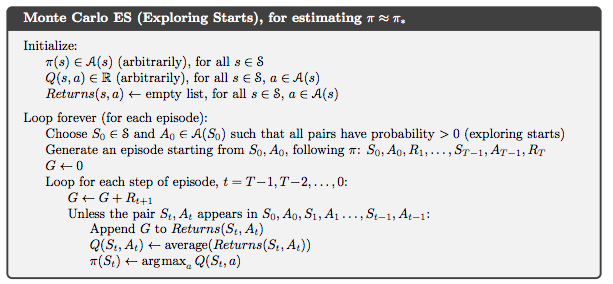

In [5]:
Image('./res/monte_carlo_es.png')

### 5.4 Monte Carlo Control without Exploring Starts

ensure that all actions are selected infinitely often is for the agent to continue to select them:
+ on-policy: evaluate or imporve the policy that is used to make decisions.
+ off-policy: evaluate or improve a policy different from that used to generate the data.

policy is *soft*, meaning that $\pi(a \mid s) > 0$ for all $s \in \mathcal{S}$ and all $a \in \mathcal{A}(s)$, but gradually shifted closer and closer to a deterministic optimal policy.

$\epsilon$-soft policies: $\pi(a \mid s) \geq \frac{\epsilon}{|\mathcal{A}(s)|}$ for all states and actions, for some $\epsilon > 0$.
+ $\epsilon$-greedy policies: most of time greedy, sometimes random.
+ For any $\epsilon$-soft policy $\pi$, any $\epsilon$-greedy policy with respect to $q_\pi$ is guaranteed to be better than or equal to $\pi$.

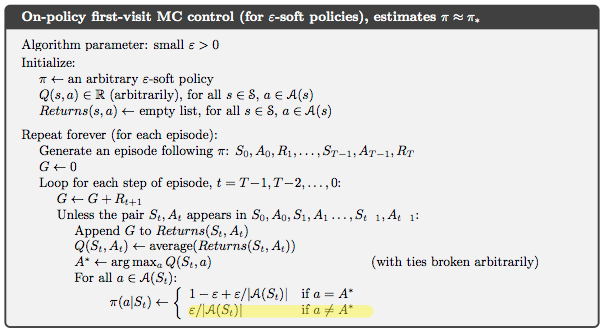

In [6]:
Image('./res/on_epsilon_soft.png')

### 5.5 Off-policy Prediction via Importances Sampling

use two policies:
+ target policy $\pi$: the potimal policy that is learned about.
+ behavior policy $b$: more exploratory policy that is used to generate behavior.

assumption of *coverage*: $\pi(a \mid s) > 0$ implies $b(a \mid s) > 0$.

we wish to estimate $v_\pi$ or $q_\pi$, but all we have are episodes following another policy $b$, where $b \neq \pi$.    
=> importance sampling: a general technique for estimating expected values under one distribution given samples from another.    
=> importance-sampling ratio $\rho_{t:T-1}$:

Given a starting state $S_t$, we have: $\operatorname{Pr}\{A_t, S_{t+1}, A_{t+1}, \cdots, S_T \mid S_t, A_{t:T-1} \sim \pi\} = \prod_{K=t}^{T-1} \pi(A_k \mid S_k) p(S_{k+1} \mid S_k, A_k)$

\begin{equation}
    \rho_{t:T-1} \doteq \prod_{K=t}^{T-1} \frac{\pi(A_k \mid S_k)}{b(A_k \mid S_k)}
\end{equation}

So we can have the right expected value by:

\begin{align}
    \mathbb{E}[G_t \mid S_t] &= v_b(S_t) \\
    \mathbb{E}[\rho_{t:T-1} G_t \mid S_t] &= v_\pi(S_t)
\end{align}

To estimate $v_\pi(s)$, we simply scale the returns by the ratios and average the results:
+ ordinary importance sampling: $V(s) \doteq \frac{\sum_{t \in \mathcal{J}(s)} \rho_{t:T(t)-1} G_t}{|\mathcal{J}(s)|}$: unbiased, but it can be extreme.
+ weighted importance sampling: $V(s) \doteq \frac{\sum_{t \in \mathcal{J}(s)} \rho_{t:T(t)-1} G_t}{\sum_{t \in \mathcal{J}(s)} \rho_{t:T(t)-1}}$: biased, but its variance is bounded.

### 5.6 Incremental Implementation

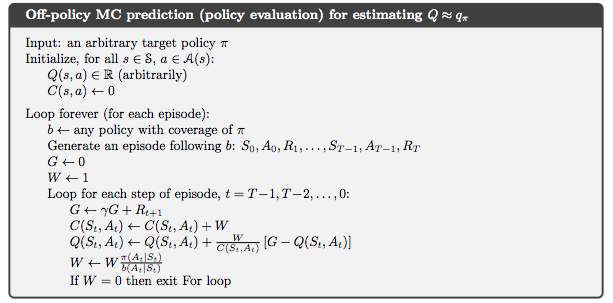

In [3]:
Image('./res/off_policy_predict.png')

### 5.7 Off-policy Monte Carlo Control

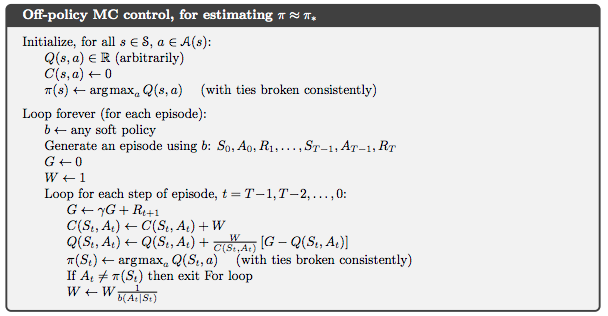

In [4]:
Image('./res/off_policy_control.png')

Potential problem: this method learns only from the tails of episodes, when all of the remaining actions in the episode are greedy. If nongreedy actions are commom => greatly slow learning.

### 5.8 Disounting-aware Importance Sampling

### 5.9 Per-decision Importance Sampling